In [1]:
# Importing libraries for accessing data and performing operations on it.

import pandas as pd 
import numpy as np 

In [2]:
#https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [3]:
# Reading the dataset(xls file) into variabel dataset

dataset = pd.read_csv("heart_data.xls")

In [4]:
# Displaying the first 5 elements of a dataset by calling head() on dataset

dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
str == type(dataset["ChestPainType"].value_counts().index[0])

True

In [7]:
for x in dataset.columns:
    if(type(dataset[x].value_counts().index[0]) == str):
        print(dataset[x].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [8]:
for x in dataset.columns:
    if(type(dataset[x].value_counts().index[0]) != str):
        print(x)

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
HeartDisease


In [9]:
# We can observe that the dataset clearly does not have any missing values, if any existed
# otherwise, the feature name with number of missing vlaues would have been outputted.

for x in dataset.columns:
    if dataset[x].isna().any() == True:
        print("The feature",x,"in dataset has missing values","(",dataset[x].sum(),")")

In [10]:
# Importing libraries that are required for visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

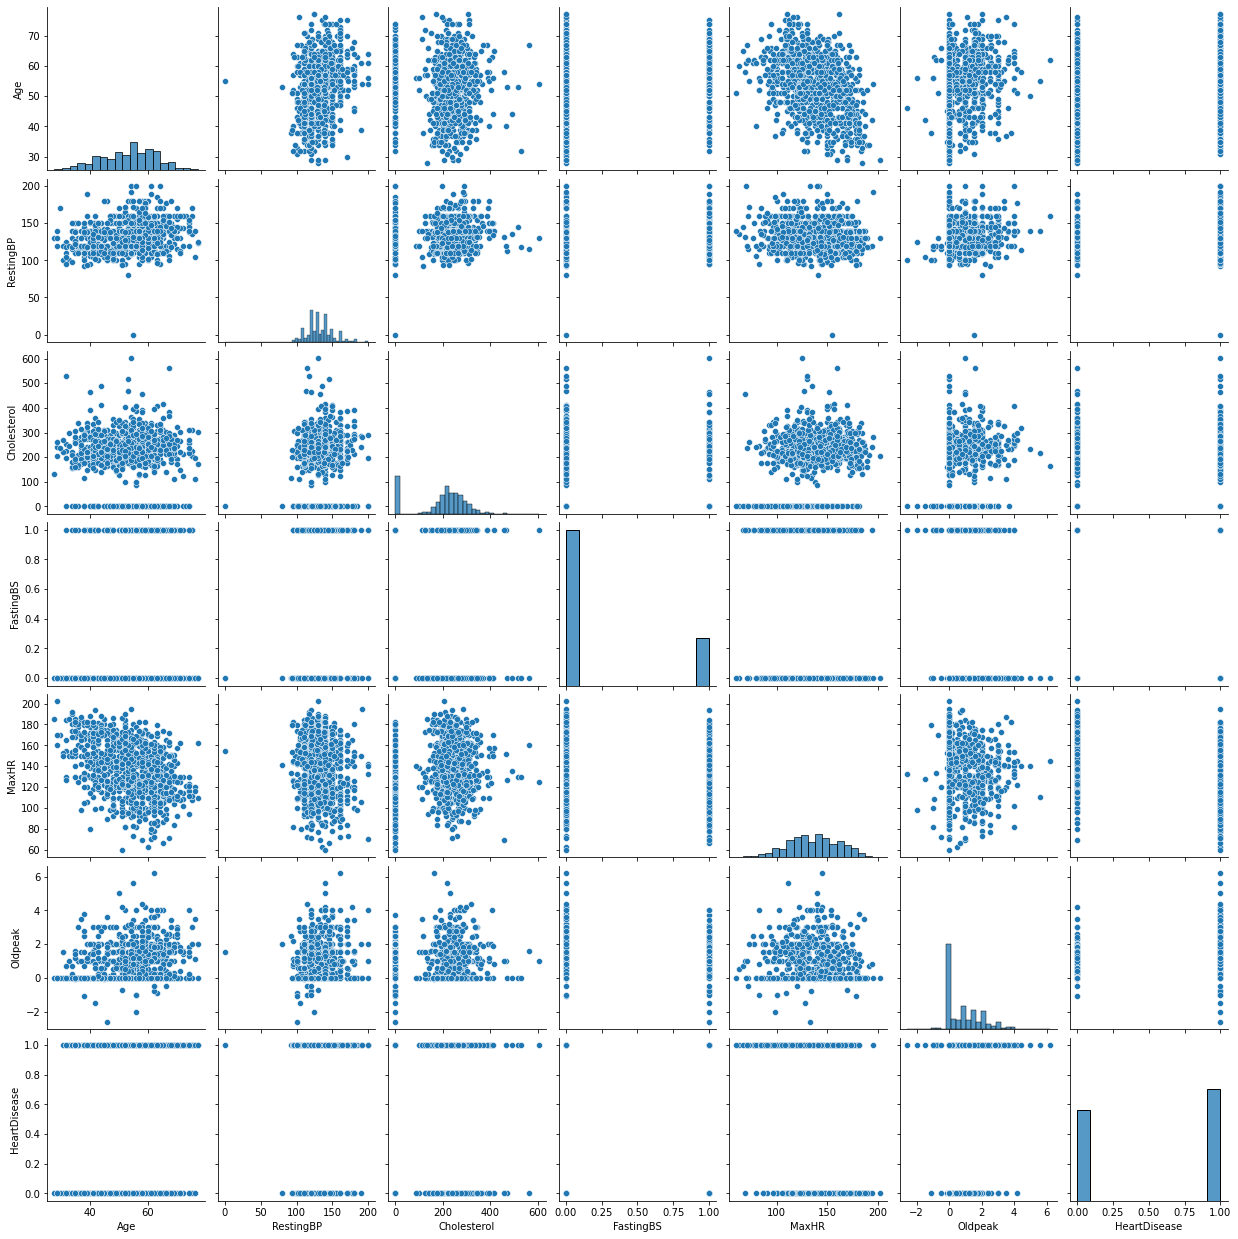

In [11]:
# The pairplot of the dataset gives us an idea of the distribution of the data

sns.pairplot(dataset)

In [11]:
""" From the observations of tha pairplot, further exploration of some features is needed
in order to understand the features and take necessary action. """


categorical_feat_Labels = ['FastingBS','HeartDisease']

for x in categorical_feat_Labels:
    print(dataset[x].value_counts())
    
"""The output conveys that the label "HeartDisease" is not imbalanced. So we shall proceed 
with futher exploration"""

0    704
1    214
Name: FastingBS, dtype: int64
1    508
0    410
Name: HeartDisease, dtype: int64


'The output conveys that the label "HeartDisease" is not imbalanced. So we shall proceed \nwith futher exploration'

<AxesSubplot:ylabel='Density'>

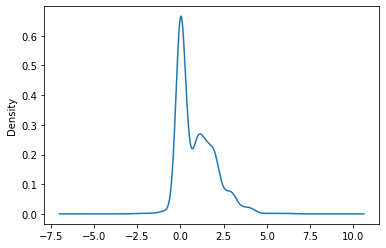

In [12]:
#We could observe that the dataset is skewed to the right.

dataset['Oldpeak'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

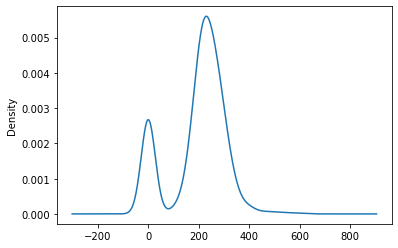

In [13]:
# The distribution of the data is not normal, further analysis is required.

dataset['Cholesterol'].plot(kind='kde')

In [14]:
#A function defined to find the mean, median and mode of any given feature in the dataset

def central_tendency(feature):
    mean = dataset[feature].mean()
    median = dataset[feature].median()
    mode = dataset[feature].mode()
        
    return mean,median,mode

In [15]:
# Calling the function "central_tendency to find out the mean, median and mode of "Oldpeak"
mean, median, mode = central_tendency('Oldpeak')
print("Central tenedency of feature Oldpeak",mean, ": mean", median, ": median", mode, ": mode")

mean, median, mode = central_tendency('Cholesterol')
print("Central tenedency of feature Cholesterol",mean, ": mean", median, ": median", mode, ": mode")

Central tenedency of feature Oldpeak 0.8873638344226581 : mean 0.6 : median 0    0.0
dtype: float64 : mode
Central tenedency of feature Cholesterol 198.7995642701525 : mean 223.0 : median 0    0
dtype: int64 : mode


In [16]:
# Importing math library for performing mathematical functions
import math

# Storing features to be explored into a list for the convenience of programming
skewed_features = ['Oldpeak',"Cholesterol"]

In [17]:
# Checking for negative values in the dataset before applying log transformation 

"""As we can see that some values are negative, we have to first transform them to a 
positive number and then do log transformation"""

for a in skewed_features:
    for x in dataset[a]:
        if x <0:
            print(x)
            
"""Since there are negative values and applying log transformation to make the data appear
similar to gaussian distribution might be tricky, we will go ahead with the data being 
intact"""

-0.9
-2.6
-1.5
-0.1
-1.0
-1.1
-0.7
-0.8
-1.0
-0.5
-2.0
-0.5
-0.1


'Since there are negative values and applying log transformation to make the data appear\nsimilar to gaussian distribution might be tricky, we will go ahead with the data being \nintact'

In [18]:
"""Applying transformations on features with skewed data to convert them to normally
distributed data"""

for x in skewed_features:
    #Applying log transformation on the features with skewed distribution
    dataset[x+'log'] = np.log(dataset[x]+2.7)
    #Applying reciprocal transformation on the features with skewed distribution
    dataset[x+"_reciprocal"] = 1/(dataset[x]+2.7)
    #Applying exponential transformation on the features with skewed distribution
    dataset[x+"_exp"] = dataset[x]**(1/5)
    #Applying square_root transformation on the features with skewed distribution
    dataset[x+"_sqrRoot"] = dataset[x]**(1/2)

In [19]:
#Importing stats library from scipy 
from scipy import stats

"""Defining a function named plots_ to visualize the transformed data. The function takes
dataset and feature name as argument and returns a histogram and probability plot (QQ plot)"""
def plots_(data,feature):
    
    plt.figure(figsize=(14,7))
    
    plt.subplot(1,2,1)
    data[feature].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist="norm",plot=plt)

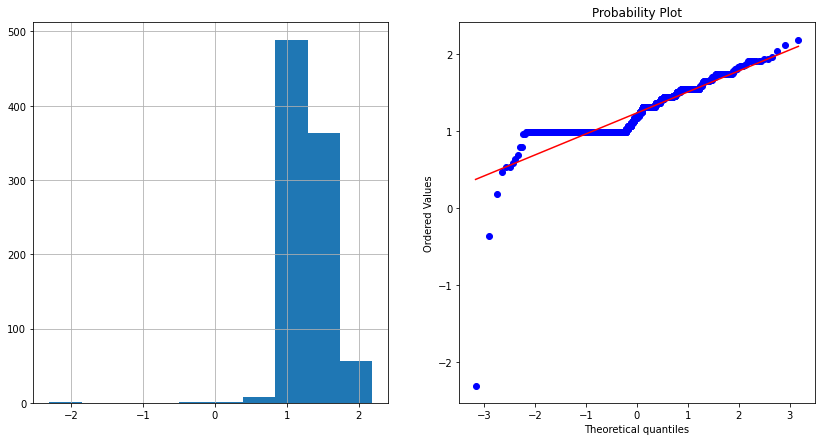

In [20]:
plots_(dataset,'Oldpeaklog')

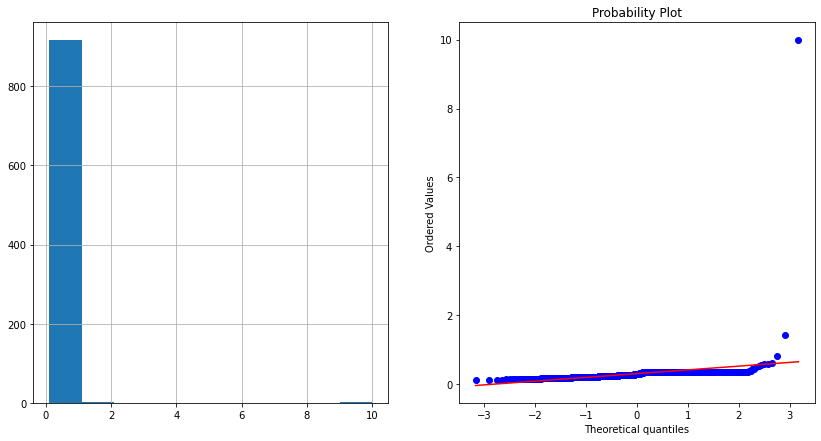

In [21]:
plots_(dataset,'Oldpeak_reciprocal')

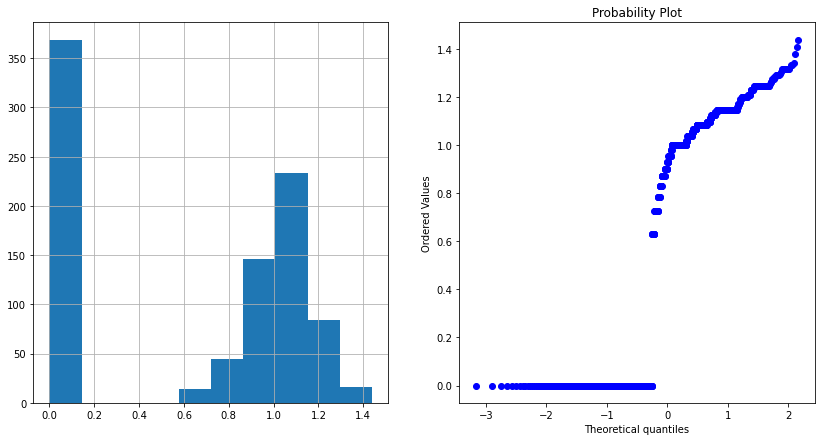

In [22]:
plots_(dataset,'Oldpeak_exp')

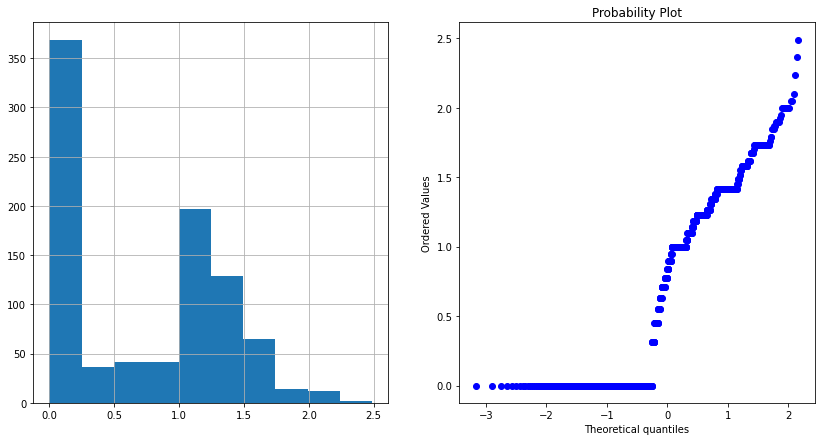

In [23]:
plots_(dataset,'Oldpeak_sqrRoot')

The reciprocal transformation seems to be the best fit among all the transformations applied. So, I will go ahead with that transformation and remove all the other transformations in the dataset.

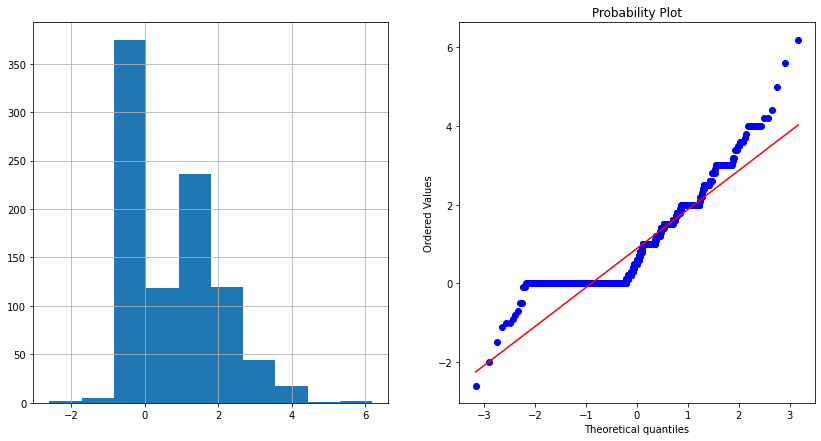

In [24]:
plots_(dataset,'Oldpeak')

In [25]:
""" Removing/Eliminating all the transformations from the dataset that aren't required 
(reasoning provided above)"""

dataset.drop(['Oldpeak_sqrRoot','Oldpeak_exp','Oldpeaklog','Oldpeak'],inplace=True,axis=1)

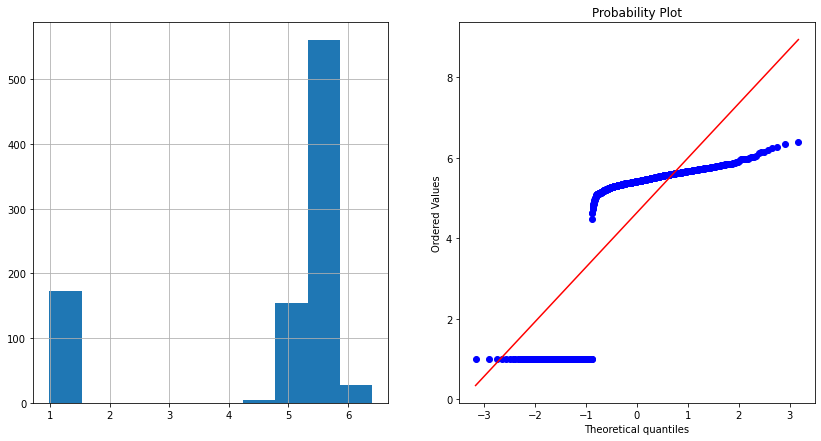

In [26]:
plots_(dataset,'Cholesterollog')

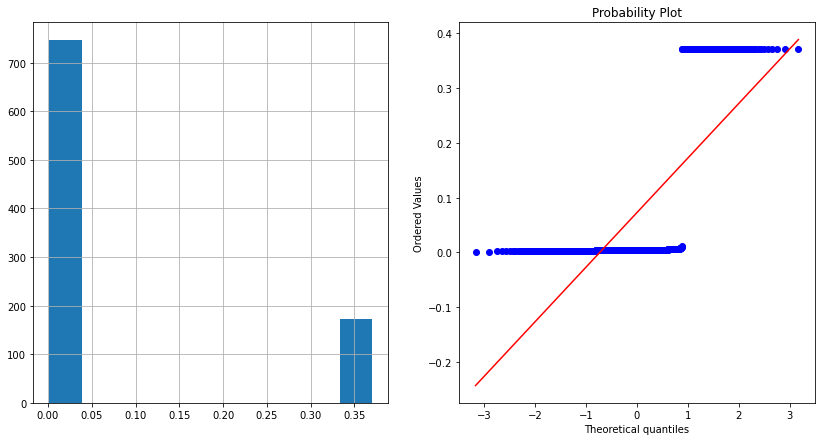

In [27]:
plots_(dataset,'Cholesterol_reciprocal')

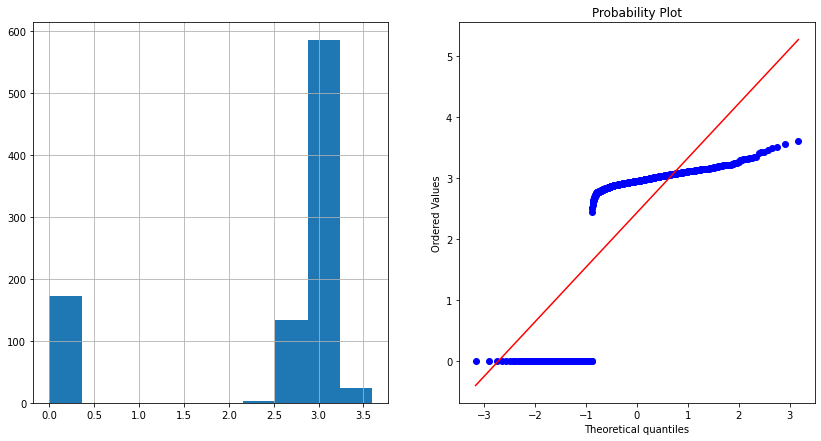

In [28]:
plots_(dataset,'Cholesterol_exp')

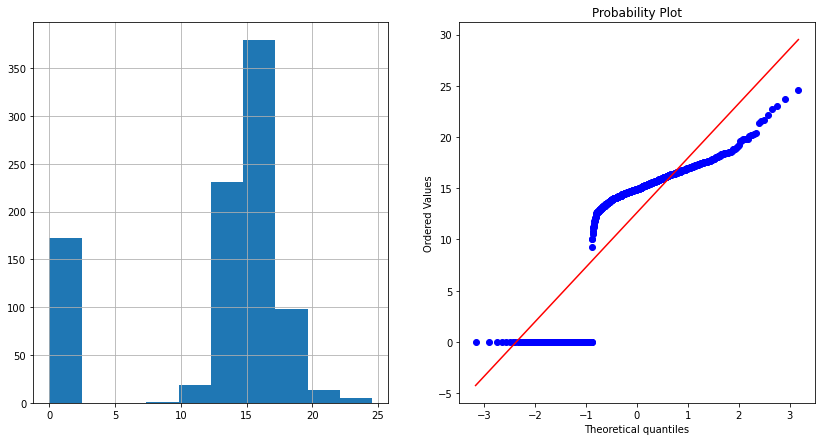

In [29]:
plots_(dataset,'Cholesterol_sqrRoot')

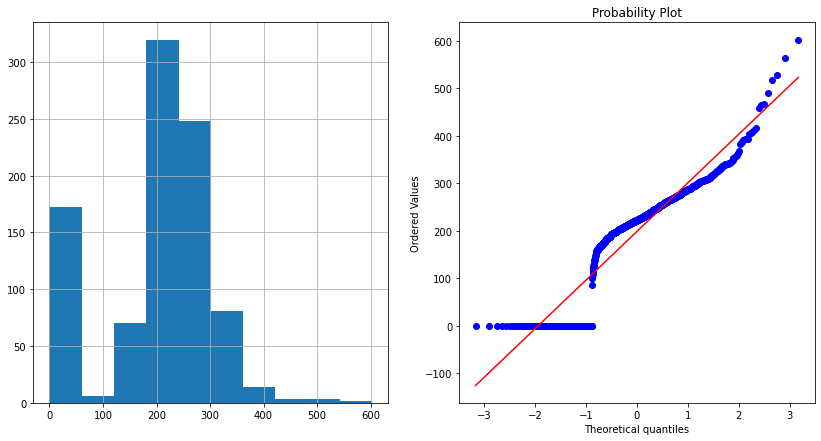

In [30]:
plots_(dataset,'Cholesterol')

The Cholesterol feature seems to be the closest to normal distribution. So I will retain
the feature as it is and remove all the transformations from the dataset

In [31]:
# Dropping the transformations that aren't required (Reasoning provided above)

dataset.drop(['Cholesterol_sqrRoot','Cholesterol_exp','Cholesterollog','Cholesterol_reciprocal'],inplace=True,axis=1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Oldpeak_reciprocal
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.282039,-0.088463
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.107589,-0.095096
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,-0.232741,-0.078116
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.267291,0.048034
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.400421,0.030839
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,1.000000,-0.061589
Oldpeak_reciprocal,-0.088463,-0.095096,-0.078116,0.048034,0.030839,-0.061589,1.000000


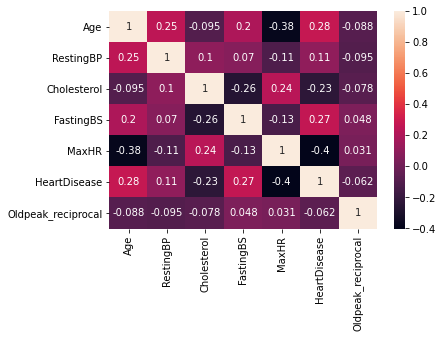

In [32]:
#Checking for correaltion between any features present in the dataset
sns.heatmap(dataset.corr(),annot=True)

dataset.corr()

In [33]:
"""Apply statistical methods to gain insights about the dataset"""

dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,Oldpeak_reciprocal
0,40,M,ATA,140,289,0,Normal,172,N,Up,0,0.370370
1,49,F,NAP,160,180,0,Normal,156,N,Flat,1,0.270270
2,37,M,ATA,130,283,0,ST,98,N,Up,0,0.370370
3,48,F,ASY,138,214,0,Normal,108,Y,Flat,1,0.238095
4,54,M,NAP,150,195,0,Normal,122,N,Up,0,0.370370


<AxesSubplot:>

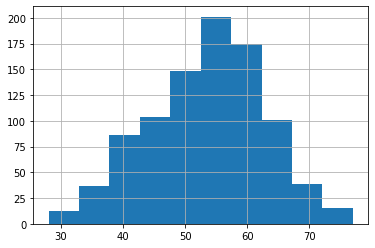

In [34]:
dataset['Age'].hist()

## One Sample t-test

In [35]:
# Importing ttest_1samp from scipy.stats to conduct 1-sample t-test
from scipy.stats import ttest_1samp

# Creating an empty dataframe
df_stats = pd.DataFrame()


"""Defining a function sample_collection that takes two arguments (dataset and feature name)
and returns the ttest value and p_value by comparing a particular feature's sample and 
population mean"""

def sample_collection(data,feature):
    sample_size=130
    df_stats[feature+"_sample"] = np.random.choice(data[feature],sample_size)
    
    ttest,p_value = ttest_1samp(df_stats[feature+"_sample"],dataset[feature].mean())
    
    print("The p_value of feature",feature,"is",(p_value/2))
    
    if (p_value/2) < 0.05:
        print('Insignificant value for feature',x,"\n")

In [36]:
# Storing all the feature names that consist of numeric values into variable "numeric_features"
numeric_features = [x for x in dataset.columns if type(dataset[x][0])!=str]

In [37]:
# Applying function sample_collection to all the features in dataset
for x in numeric_features:
    sample_collection(dataset,x)

The p_value of feature Age is 0.36145310008393405
The p_value of feature RestingBP is 0.0917176581603726
The p_value of feature Cholesterol is 0.33696525638354874
The p_value of feature FastingBS is 0.4748332997208768
The p_value of feature MaxHR is 0.07582060530917235
The p_value of feature HeartDisease is 0.3038834451792384
The p_value of feature Oldpeak_reciprocal is 0.044623104534407425
Insignificant value for feature Oldpeak_reciprocal 



### Observation

We can conclude that there is no difference between sample mean and population mean for all the features in the dataset

In [38]:
# Collecting all the feature names consisting categorical features
categorical_features = [x for x in dataset.columns if type(dataset[x][0])==str]

In [39]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

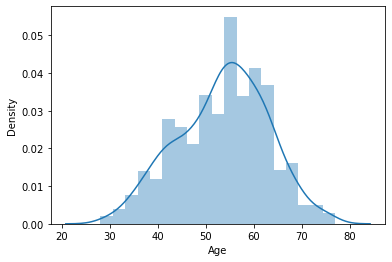

In [40]:
sns.distplot(dataset['Age'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

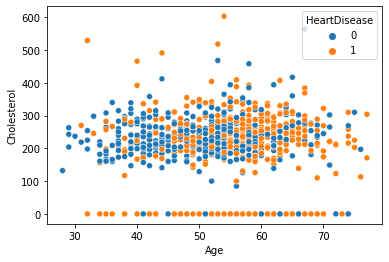

In [41]:
sns.scatterplot('Age','Cholesterol',data=dataset,hue='HeartDisease')

In [42]:
categorical_table = pd.crosstab(np.random.choice(dataset['Sex'],90),np.random.choice(dataset['RestingECG'],90))

In [43]:
categorical_table

observed_values = categorical_table.values

In [44]:
# Importing chi2_contingency from scipy.stats to perform contingency test
from scipy.stats import chi2_contingency

#Applying contingency test on the data
contingency = chi2_contingency(categorical_table)

In [45]:
# printing teh contingency vlaue ot see the expected values 
print(contingency)

# Storing the expected values into a variable. 
expected_values = contingency[3]

(1.1156168569544884, 0.5724622821238285, 2, array([[ 2.26666667, 10.57777778,  4.15555556],
       [ 9.73333333, 45.42222222, 17.84444444]]))


In [46]:
# Storing the number of rows and columns into variables for performing chi_square test
rows = categorical_table.shape[0]
columns = categorical_table.shape[1]

# Calculating and storing the degrees of freedom.
degrees_of_freedom = (rows-1)*(columns-1)
print("degrees of freedom : ",degrees_of_freedom)

# Setting the alpha value to 0.05
alpha = 0.05

degrees of freedom :  2


In [47]:
from scipy.stats import chi2

for o,e in observed_values,expected_values:
    chi_square_value = ((o-e)**2)/2

In [48]:
chi_square_statistic = chi_square_value[0]+chi_square_value[1]+chi_square_value[2]

In [49]:
print("chi square statistic is ",chi_square_statistic)

chi square statistic is  728.6360493827162


In [50]:
p_value = 1-chi2.cdf(x=chi_square_statistic,df=degrees_of_freedom)

In [51]:
p_value

0.0

### Observation

As the p value evaluates to 0, I can conclude that there is a relation between the features 
"Sex" and "RestingECG" (Sample size = 90)

## DEALING WITH CATEGORICAL VARIABLES

In [52]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,Oldpeak_reciprocal
0,40,M,ATA,140,289,0,Normal,172,N,Up,0,0.370370
1,49,F,NAP,160,180,0,Normal,156,N,Flat,1,0.270270
2,37,M,ATA,130,283,0,ST,98,N,Up,0,0.370370
3,48,F,ASY,138,214,0,Normal,108,Y,Flat,1,0.238095
4,54,M,NAP,150,195,0,Normal,122,N,Up,0,0.370370


In [53]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [54]:
for x in categorical_features:
    print("Feature: ",x,"\n",dataset[x].value_counts())

Feature:  Sex 
 M    725
F    193
Name: Sex, dtype: int64
Feature:  ChestPainType 
 ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Feature:  RestingECG 
 Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
Feature:  ExerciseAngina 
 N    547
Y    371
Name: ExerciseAngina, dtype: int64
Feature:  ST_Slope 
 Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


### Observation

In the output above, I have printed out the value_counts() for each categorical variable
 in order to check if there are any feature values that dominate others. These imbalanced 
 proportions can imapact the functioning of machine learning algorithm. We have to deal with
 imbalanced features before proceeding onto other steps.

In [55]:
#Storing the value_counts of feature "sex" in a variable 
class_counts_Sex = pd.value_counts(dataset['Sex'])

Text(0, 0.5, 'Frequency')

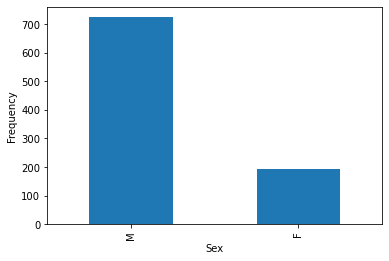

In [56]:
# Plotting the value_counts of features "Sex" in the form of bar graph. 
class_counts_Sex.plot(kind='bar')

# Naming the labels (x and y)
plt.xlabel("Sex")
plt.ylabel("Frequency")

In [57]:
imbalance_set = dataset.copy()


X = imbalance_set.drop('Sex',axis=1)
y = imbalance_set['Sex']

In [58]:
# Seperating the dataset based on sex type

male = dataset[dataset['Sex']=='M']
female = dataset[dataset['Sex']=="F"]

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
over_sampler = RandomOverSampler()

In [61]:
X_bal,y_bal = over_sampler.fit_resample(X,y)

In [62]:
print("Original dataset shape :","X:",X.shape,"Y:",y.shape)
print("Resampled dataset shape :","X:",X_bal.shape,"Y:",y_bal.shape)

Original dataset shape : X: (918, 11) Y: (918,)
Resampled dataset shape : X: (1450, 11) Y: (1450,)


In [63]:
dataset = pd.concat([X_bal,y_bal],axis=1)

In [64]:
# The oversamploing process is succesfully done. We now have equal number of feature values
# in features sex

In [65]:
for x in categorical_features:
    print("Feature: ",x,dataset[x].value_counts())

Feature:  Sex F    725
M    725
Name: Sex, dtype: int64
Feature:  ChestPainType ASY    682
NAP    357
ATA    332
TA      79
Name: ChestPainType, dtype: int64
Feature:  RestingECG Normal    893
LVH       323
ST        234
Name: RestingECG, dtype: int64
Feature:  ExerciseAngina N    977
Y    473
Name: ExerciseAngina, dtype: int64
Feature:  ST_Slope Up      726
Flat    641
Down     83
Name: ST_Slope, dtype: int64


In [66]:
# One Hot Encoding to deal with categorial variables. 

dataset = pd.get_dummies(dataset,drop_first=True)

In [67]:
dataset.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Oldpeak_reciprocal,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140,289,0,172,0,0.370370,1,0,0,1,0,0,0,1,1
1,49,160,180,0,156,1,0.270270,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0,0.370370,1,0,0,0,1,0,0,1,1
3,48,138,214,0,108,1,0.238095,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0,0.370370,0,1,0,1,0,0,0,1,1


In [68]:
X = dataset.drop('HeartDisease',axis=1)
y = dataset['HeartDisease']

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
classifier = DecisionTreeClassifier()

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
decision_tree_params = {
                        'criterion':['gini','entropy'],
                        'splitter':['best','random'],
                        'max_features':['auto','sqrt'],
                        'max_depth':[3,6,7,8,9,10,20,21,22,23,24,25,30,35,40,45,50,55,60,None],
                        'min_samples_leaf': [1,2,4,6,5],
                        'min_samples_split': [2, 5, 10]
}

In [73]:
randomized_cv = RandomizedSearchCV(classifier,param_distributions=decision_tree_params,n_jobs=-1,cv=10)

In [74]:
randomized_cv.fit(X,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 7, 8, 9, 10, 20, 21,
                                                      22, 23, 24, 25, 30, 35,
                                                      40, 45, 50, 55, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [75]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [76]:
randomized_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini'}

In [77]:
randomized_cv.best_score_

0.873793103448276

In [78]:
classifier = DecisionTreeClassifier(splitter='best',
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= 10,
 criterion='gini')

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
classifier.fit(X,y)

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [81]:
cross_val_score(classifier, X,y, scoring="accuracy",cv=10)

array([0.91724138, 0.89655172, 0.77931034, 0.8137931 , 0.86206897,
       0.91034483, 0.87586207, 0.87586207, 0.9862069 , 0.90344828])

In [82]:
final_score = cross_val_score(classifier,X,y,scoring='accuracy',cv=10).mean()

In [83]:
final_score

0.8675862068965516

In [84]:
import pickle

In [85]:
import flask

In [86]:
file = open('classifier.pkl','wb')

In [87]:
pickle.dump(classifier,file)

In [88]:
file.close()

In [89]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak_reciprocal,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140,289,0,172,0.370370,1,0,0,1,0,0,0,1,1
1,49,160,180,0,156,0.270270,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0.370370,1,0,0,0,1,0,0,1,1
3,48,138,214,0,108,0.238095,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0.370370,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,51,160,194,0,170,0.370370,1,0,0,1,0,0,0,1,0
1446,71,112,149,0,125,0.232558,0,0,0,1,0,0,1,0,0
1447,47,140,257,0,135,0.270270,1,0,0,1,0,0,0,1,0
1448,57,140,241,0,123,0.344828,0,0,0,1,0,1,1,0,0


In [90]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak_reciprocal', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_M'],
      dtype='object')

In [91]:
dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Oldpeak_reciprocal,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140,289,0,172,0,0.370370,1,0,0,1,0,0,0,1,1
1,49,160,180,0,156,1,0.270270,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0,0.370370,1,0,0,0,1,0,0,1,1
3,48,138,214,0,108,1,0.238095,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0,0.370370,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,51,160,194,0,170,0,0.370370,1,0,0,1,0,0,0,1,0
1446,71,112,149,0,125,0,0.232558,0,0,0,1,0,0,1,0,0
1447,47,140,257,0,135,0,0.270270,1,0,0,1,0,0,0,1,0
1448,57,140,241,0,123,1,0.344828,0,0,0,1,0,1,1,0,0


In [92]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak_reciprocal', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_M'],
      dtype='object')

In [93]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak_reciprocal,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140,289,0,172,0.370370,1,0,0,1,0,0,0,1,1
1,49,160,180,0,156,0.270270,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0.370370,1,0,0,0,1,0,0,1,1
3,48,138,214,0,108,0.238095,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0.370370,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,51,160,194,0,170,0.370370,1,0,0,1,0,0,0,1,0
1446,71,112,149,0,125,0.232558,0,0,0,1,0,0,1,0,0
1447,47,140,257,0,135,0.270270,1,0,0,1,0,0,0,1,0
1448,57,140,241,0,123,0.344828,0,0,0,1,0,1,1,0,0


In [94]:
pip install session_info

Note: you may need to restart the kernel to use updated packages.


In [95]:
import session_info

In [97]:
session_info.show()

In [99]:
pip freeze > requirements2.txt

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install gunicorn

     |████████████████████████████████| 79 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [97]:
pip freeze | grep gunicorn

gunicorn==20.1.0
Note: you may need to restart the kernel to use updated packages.
